# Tweets Clustering

In [48]:
import pandas as pd
import numpy as np
import nltk

In [49]:
modi = pd.read_csv("D:dataset/narendramodi_tweets.csv")

In [50]:
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


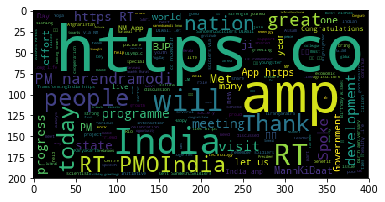

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

modi1=' '.join(modi['text'])
wc=WordCloud(background_color='black').generate(modi1)
plt.imshow(wc)

In [52]:
docs=modi['text'].str.lower().str.replace('[^a-z #@]','')

stemmer=nltk.stem.PorterStemmer()

def clean_sentence(text):
    stopwords=nltk.corpus.stopwords.words('english')
    words=text.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean=docs.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2       rt @pmoindia empow marginalis httpstcowwsqgwdk
3    rt @pmoindia commit welfar farmer httpstcopaaf...
4    rt @pmoindia improv qualiti life poor httpstco...
Name: text, dtype: object

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vector=CountVectorizer(min_df=5)
vector.fit(docs_clean)
dtm=vector.transform(docs_clean)
dtm

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [54]:
no_of_zeros=(3220*1228)-24800
sparse=no_of_zeros/(3220*1228)*100
sparse

99.372812430453

In [55]:
df_dtm=pd.DataFrame(dtm.toarray(),columns=vector.get_feature_names())
(df_dtm==0).sum().sum()

3929360

In [56]:
(3220*1228)-3929360


24800

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans=KMeans(n_clusters=4)
kmeans.fit(df_dtm)
pred=kmeans.predict(df_dtm)

In [58]:
predict=pd.DataFrame(docs_clean)

In [59]:
predict['m']=pred
predict.head()

,text,m
0,presid address wonder encapsul india strength ...,0
1,rashtrapati ji address hous parliament indepth...,0
2,rt @pmoindia empow marginalis httpstcowwsqgwdk,1
3,rt @pmoindia commit welfar farmer httpstcopaaf...,1
4,rt @pmoindia improv qualiti life poor httpstco...,1


In [60]:
g1 = predict[predict['m']==0]
g2 = predict[predict['m']==1]
g3 = predict[predict['m']==2]
g4 = predict[predict['m']==3]
g1.head()

,text,m
0,presid address wonder encapsul india strength ...,0
1,rashtrapati ji address hous parliament indepth...,0
9,rt @rashtrapatibhvn standup india initi govt p...,0
16,rt @rashtrapatibhvn resili amp forbear demonst...,0
20,get ebook tensionfre exam amp personalis exam ...,0


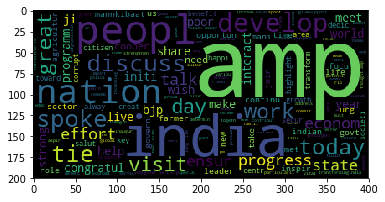

In [61]:
a=' '.join(g1['text'])
wc1=WordCloud(background_color='black').generate(a)
plt.imshow(wc1)

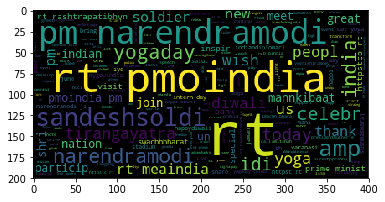

In [62]:
b=' '.join(g2['text'])
wc2=WordCloud(background_color='black').generate(b)
plt.imshow(wc2)

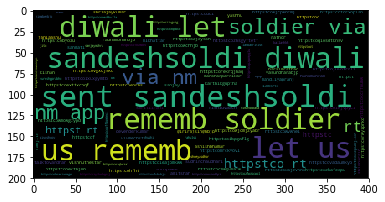

In [63]:
c=' '.join(g3['text'])
wc3=WordCloud(background_color='black').generate(c)
plt.imshow(wc3)

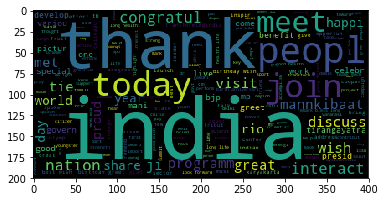

In [64]:
d=' '.join(g4['text'])
wc4=WordCloud(background_color='black').generate(d)
plt.imshow(wc4)

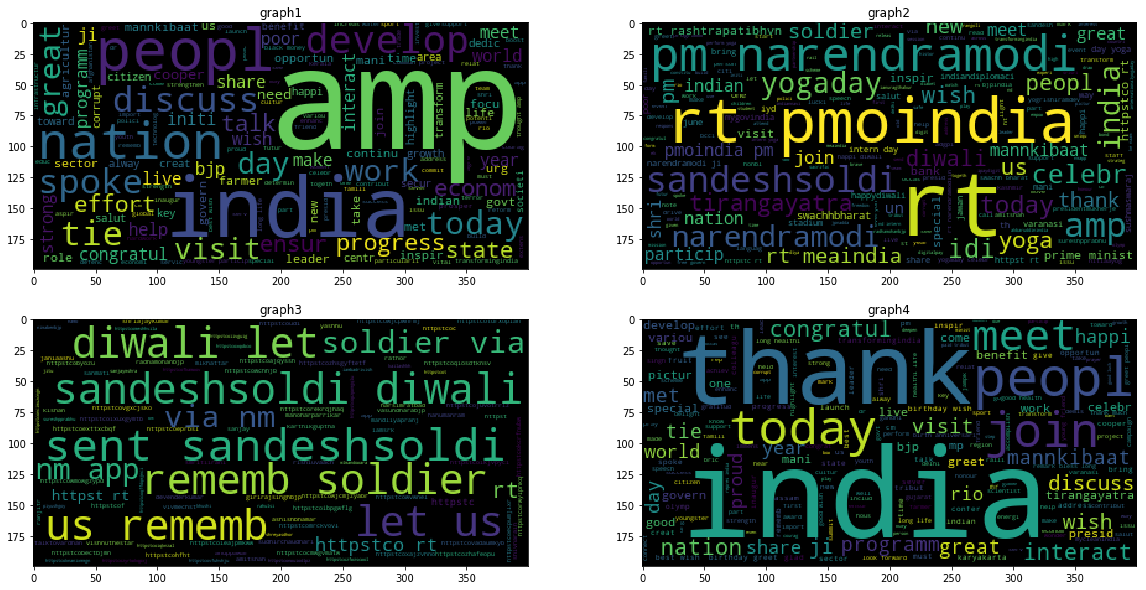

In [65]:
from pylab import *
plt.figure(figsize=(20,10))
subplot(2,2,1)
plt.imshow(wc1)
title('graph1')

 
subplot(2,2,2)
plt.imshow(wc2)
title('graph2')

subplot(2,2,3)
plt.imshow(wc3)
title('graph3')

 
subplot(2,2,4)
plt.imshow(wc4)
title('graph4')


 
show()

# Sentiment Analysis (Supervised vs Unsupervised) 

In [66]:
imdb = pd.read_csv("D:/dataset/hotstar.allreviews_Sentiments.csv")

In [67]:
imdb.shape

(5053, 13)

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer();

In [69]:
def get_sentiment(text):
    score = sentiment.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    elif -0.05 <= score and score <= 0.05:
        return 'Neutral'

In [70]:
imdb['sentiment_vader'] = imdb['Reviews'].apply(get_sentiment)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(imdb['Sentiment_Manual'],imdb['sentiment_vader'])

0.5503661191371463

In [72]:
stemmer = nltk.stem.PorterStemmer()

In [73]:
stopwords = nltk.corpus.stopwords.words('english')

In [74]:
docs = imdb['Reviews'].str.lower().str.replace('[^a-z ]', '')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0                                                   hh
1                                                     
2    hotstarhelp paymnt premium subscript transact ...
3    hotstartweet current jio network would like kn...
4    hotstartweet episod sarabhai vs sarabhai seaso...
Name: Reviews, dtype: object

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer()
vectorize.fit(docs_clean)
dtm = vectorize.transform(docs_clean)
dtm

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [76]:
df_dtm = pd.DataFrame(dtm.toarray() , columns = vectorize.get_feature_names())

In [77]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm , test_size = 0.2, random_state =100)
test_y = imdb.iloc[test_x.index]['Sentiment_Manual']
train_y = imdb.loc[train_x.index]['Sentiment_Manual']

In [78]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.metrics import accuracy_score
mnb_model = MultinomialNB()
gnb_model = GaussianNB()
mnb_model.fit(train_x , train_y)
mnb_predict_class = mnb_model.predict(test_x)
print(accuracy_score(test_y ,mnb_predict_class) ,'multinomial')
gnb_model.fit(train_x , train_y)
gnb_predict_class = gnb_model.predict(test_x)
print(accuracy_score(test_y ,gnb_predict_class) ,'gausian')

0.7359050445103857 multinomial
0.6181998021760633 gausian


## Naive bayes
    

In [79]:
imdb['Day'] = [(i%7)+1 for i in imdb.Date]
imdb['Day'].unique()

array([4, 5, 6, 1, 2, 7, 3], dtype=int64)

In [80]:
a = imdb[imdb.Sentiment_Manual == 'Neutral'].groupby('Day').count()
b = imdb[imdb.Sentiment_Manual == 'Negative'].groupby('Day').count()
c = imdb[imdb.Sentiment_Manual == 'Positive'].groupby('Day').count()

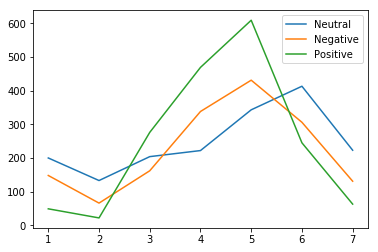

In [81]:
plt.plot(a[['ID']])
plt.plot(b[['ID']])
plt.plot(c[['ID']])
plt.legend(['Neutral','Negative','Positive'])